In [1]:
from __future__ import annotations

from typing import Union, Optional

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.axes import Axes
plt.style.use('/home/inca/default.mplstyle')

In [2]:
players_2324_path = "./Quotazioni_Fantacalcio_Stagione_2023_24.csv"
players_2223_path = "./Quotazioni_Fantacalcio_Stagione_2022_23.csv"
stats_2223_path = "./Statistiche_Fantacalcio_Stagione_2022_23.csv"
stats_2324_path = "./Statistiche_Fantacalcio_Stagione_2023_24.csv"
# the latter is updated at the 18th round - 2nd Jan 2024

players_2324_df = pd.read_csv(players_2324_path, delimiter=",", header=1, index_col=False)
players_2223_df = pd.read_csv(players_2223_path, delimiter=",", header=1, index_col=False)
stats_2223_df = pd.read_csv(stats_2223_path, delimiter=",", header=1, index_col=False)
stats_2324_df = pd.read_csv(stats_2324_path, delimiter=",", header=1, index_col=False)

# basic functions

In [3]:
class Filter:

    def __init__(
            self: Filter, column: str, operation: str, value: Union[str, float]) -> None:
        self.column = column
        self.operation = operation
        self.value = value
    
    def apply_to_df(self: Filter, df: pd.DataFrame) -> pd.DataFrame:
        if self.operation == "ge":
            return df[df[self.column] > self.value]
        elif self.operation == "geq":
            return df[df[self.column] >= self.value]
        elif self.operation == "le":
            return df[df[self.column] < self.value]
        elif self.operation == "leq":
            return df[df[self.column] <= self.value]
        elif self.operation == "eq":
            return df[df[self.column] == self.value]
        elif self.operation == "neq":
            return df[df[self.column] != self.value]


def apply_multiple_filters(df: pd.DataFrame, filter_list: list[Filter]) -> pd.DataFrame:
    filtered_df = df.copy()
    for filter in filter_list:
        filtered_df = filter.apply_to_df(filtered_df)
    return filtered_df


def extract_players_mantra_position(df: pd.DataFrame, position: str) -> pd.DataFrame:
    """
    The mantra position is tricky, because they actually include multiple positions with ; as delimiter.
    The easiest way is to select the players where the mantra position column contains also that specific position.
    """
    return df[df["RM"].str.contains(position)]


In [4]:
# example: extract players of a team
Filter("Squadra", "eq", "Fiorentina").apply_to_df(players_2324_df)

,Id,R,RM,Nome,Squadra,Qt.A,Qt.I,Diff.,Qt.A M,Qt.I M,Diff.M,FVM,FVM M
0,2815,P,Por,Terracciano,Fiorentina,19,10,9,19,10,9,55,55
55,6184,P,Por,Martinelli T.,Fiorentina,1,1,0,1,1,0,1,1
59,6403,P,Por,Christensen O.,Fiorentina,1,3,-2,1,3,-2,3,3
72,5323,D,Dc,Martinez Quarta,Fiorentina,15,6,9,15,6,9,28,28
81,252,D,Ds;E,Biraghi,Fiorentina,11,10,1,11,10,1,31,28
102,6235,D,Dd;Ds;E,Kayode,Fiorentina,9,1,8,8,2,6,25,25
140,4378,D,Ds;Dc,Ranieri L.,Fiorentina,6,5,1,6,6,0,17,20
151,2164,D,Dc,Milenkovic,Fiorentina,5,10,-5,5,10,-5,25,25
177,5449,D,Ds;E,Parisi,Fiorentina,4,8,-4,4,8,-4,20,20
207,4210,D,Dc,Mina,Fiorentina,2,8,-6,2,8,-6,9,9


In [5]:
# example on how to use a filter
filter = Filter("Qt.A M", "geq", 15)
good_players = filter.apply_to_df(players_2324_df)
good_players

,Id,R,RM,Nome,Squadra,Qt.A,Qt.I,Diff.,Qt.A M,Qt.I M,Diff.M,FVM,FVM M
0,2815,P,Por,Terracciano,Fiorentina,19,10,9,19,10,9,55,55
1,2428,P,Por,Sommer,Inter,18,15,3,18,15,3,95,95
2,5876,P,Por,Di Gregorio,Monza,18,12,6,18,12,6,66,66
3,453,P,Por,Szczesny,Juventus,17,15,2,17,15,2,90,90
4,133,P,Por,Skorupski,Bologna,15,10,5,15,10,5,47,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,6226,A,Pc,Castellanos,Lazio,16,13,3,16,12,4,37,27
475,6227,A,Pc,Okafor,Milan,16,16,0,15,15,0,28,18
476,507,A,Pc,Muriel,Atalanta,15,14,1,15,13,2,40,30
477,6001,A,A,Banda,Lecce,15,8,7,15,8,7,40,40


In [6]:
# example on how to use multiple filters to extract cheap but good goalkeepers
filter_list = [
    Filter("RM", "eq", "Por"),
    Filter("Qt.A M", "geq", 10),
    Filter("FVM M", "leq", 50)
]
filtered_df = apply_multiple_filters(players_2324_df, filter_list)
filtered_df

,Id,R,RM,Nome,Squadra,Qt.A,Qt.I,Diff.,Qt.A M,Qt.I M,Diff.M,FVM,FVM M
4,133,P,Por,Skorupski,Bologna,15,10,5,15,10,5,47,47
5,2134,P,Por,Falcone,Lecce,15,8,7,15,8,7,25,25
8,2170,P,Por,Milinkovic-Savic V.,Torino,13,10,3,13,10,3,45,45
11,4957,P,Por,Montipo',Verona,12,7,5,12,7,5,13,13
12,5116,P,Por,Martinez Jo.,Genoa,11,8,3,11,8,3,25,25
13,4431,P,Por,Carnesecchi,Atalanta,10,11,-1,10,11,-1,30,30


In [7]:
# example: players who can play also as difensori centrali
difensori_centrali = extract_players_mantra_position(players_2324_df, "Dc")
difensori_centrali

,Id,R,RM,Nome,Squadra,Qt.A,Qt.I,Diff.,Qt.A M,Qt.I M,Diff.M,FVM,FVM M
67,2724,D,Dc,Buongiorno,Torino,17,11,6,17,11,6,60,60
68,513,D,Dc,Acerbi,Inter,16,11,5,16,11,5,42,42
71,4751,D,Dc,Tomori,Milan,15,13,2,15,13,2,64,64
72,5323,D,Dc,Martinez Quarta,Fiorentina,15,6,9,15,6,9,28,28
73,2788,D,Dc,Bremer,Juventus,14,13,1,14,13,1,75,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,6253,D,Dc,N'guessan,Torino,1,1,0,1,1,0,1,1
254,6430,D,Dc,Kalaj,Frosinone,1,1,0,1,1,0,1,1
256,6433,D,Dc,Huijsen,Juventus,1,1,0,1,1,0,1,1
257,6460,D,Dc,Pellegrino,Milan,1,1,0,1,1,0,1,1


# pre-asta: interesting players

In [25]:
atalanta_players = ["Lookman", "Scamacca", "Zapata D.", "Scalvini",
                    "Toure' E.", "Zappacosta", "Kolasinac", "Bakker",
                    "Ederson D.s.", "Koopmeiners", "De Roon", "De Ketelaere"]

bologna_players = ["Zirkzee", "Beukema", "Ferguson", "Moro N.", "Orsolini", "Dominguez", "Ndoye"]

cagliari_players = ["Lapadula", "Jankto", "Sulemana I.", "Makoumbou", "Luvumbo", "Nandez"]

empoli_players = ["Baldanzi", "Gyasi", "Caputo", "Henderson", "Cancellieri", "Shpendi"]

fiorentina_players = ["Amrabat", "Gonzalez N.", "Arthur Melo", "Milenkovic",
                      "Bonaventura", "Dodo'", "Mina", "Parisi", "Kayode", "Beltran"]

frosinone_players = ["Cuni", "Caso"]

genoa_players = ["Malinovskyi", "Dragusin", "Retegui", "Strootman", "Gudmundsson A.", "Messias", "Aramu"]

inter_players = ["Martinez L.", "Barella", "Dimarco", "Bastoni", "Frattesi", "Carlos Augusto"]

juventus_players = ["Danilo", "Weah", "Fagioli", "Miretti", "Kostic", "Locatelli", "Chiesa"]

lazio_players = ["Rovella", "Casale", "Provedel", "Lazzari", "Zaccagni", "Luis Alberto", "Kamada", "Immobile"]

lecce_players = ["Rafia", "Maleh", "Baschirotto", "Almqvist", "Strefezza", "Krstovic"]

milan_players = ["Chukwueze", "Maignan", "Hernandez T.", "Thiaw", "Kalulu",
                 "Reijnders", "Romero L.", "Krunic", "Rafael Leao", "Bennacer", "Loftus-Cheek"]

monza_players = ["Ciurria", "Di Gregorio", "Colpani", "Pessina", "Mari'", "D'ambrosio", "Colombo"]

napoli_players = ["Rrahmani", "Cajuste", "Zambo Anguissa", "Simeone",
                  "Raspadori", "Di Lorenzo", "Meret", "Mario Rui"]

roma_players = ["Pellegrini Lo.", "Renato Sanches", "Zalewski", "Bove", "Smalling", "N'dicka", "Aouar"]

salernitana_players = ["Mazzocchi", "Candreva", "Ochoa", "Coulibaly L.", "Kastanos"]

sassuolo_players = ["Berardi", "Lauriente'", "Lopez M.", "Matheus Henrique", "Viti", "Mulattieri", "Erlic", "Bajrami"]

torino_players = ["Milinkovic-Savic V.", "Vlasic", "Sanabria", "Bellanova",
                  "Schuurs", "Ilic", "Vojvoda", "Ricci S."]

udinese_players = ["Deulofeu", "Beto", "Kamara H.", "Lovric"]

verona_players = ["Ngonge", "Folorunsho", "Djuric", "Bonazzoli", "Faraoni", "Montipo'"]


interesting_players_preasta = atalanta_players + bologna_players + cagliari_players + empoli_players + fiorentina_players + \
    frosinone_players + genoa_players + inter_players + juventus_players + lazio_players + \
        lecce_players + milan_players + monza_players + napoli_players + roma_players + \
            salernitana_players + sassuolo_players + torino_players + udinese_players + verona_players

In [26]:
preasta_players_2324_df = players_2324_df[np.isin(players_2324_df["Nome"], interesting_players_preasta)]
preasta_players_2223_df = players_2223_df[np.isin(players_2223_df["Nome"], interesting_players_preasta)]
preasta_stats_2223_df = stats_2223_df[np.isin(stats_2223_df["Nome"], interesting_players_preasta)]
preasta_stats_2223_df = stats_2223_df[np.isin(stats_2223_df["Nome"], interesting_players_preasta)]

In [27]:
print(preasta_players_2324_df.shape)
print(preasta_players_2223_df.shape)
print(preasta_stats_2223_df.shape)

(132, 13)
(100, 13)
(103, 18)


In [28]:
# three players did not finish the season in Serie A last year
# Viti -> Nice
# Malinovskyi -> Marseille
# Scamacca -> West Ham
preasta_stats_2223_df[np.invert(np.isin(preasta_stats_2223_df["Nome"], preasta_players_2223_df["Nome"]))]

,Id,R,Rm,Nome,Squadra,Pv,Mv,Fm,Gf,Gs,Rp,Rc,R+,R-,Ass,Amm,Esp,Au
166,5718,D,Dc,Viti,Empoli,0,0.0,0.00,0,0,0,0,0,0,0,0,0,0
352,4427,C,T,Malinovskyi,Atalanta,12,6.0,6.38,1,0,0,0,0,0,2,2,0,0
556,2137,A,Pc,Scamacca,Sassuolo,0,0.0,0.00,0,0,0,0,0,0,0,0,0,0


In [15]:
# players in Serie A who did not play last year in Serie A
preasta_players_2324_df[np.invert(np.isin(preasta_players_2324_df["Nome"], preasta_stats_2223_df["Nome"]))]

,Id,R,RM,Nome,Squadra,Qt.A,Qt.I,Diff.,Qt.A M,Qt.I M,Diff.M,FVM,FVM M
81,5067,D,E,Bakker,Atalanta,11,12,-1,10,11,-1,23,20
98,2640,D,Ds;Dc,Kolasinac,Atalanta,9,9,0,10,10,0,22,27
106,4317,D,Dc,N'dicka,Roma,8,9,-1,8,9,-1,18,18
117,4210,D,Dc,Mina,Fiorentina,7,8,-1,7,8,-1,12,12
124,5555,D,Ds;E,Kamara H.,Udinese,7,6,1,7,6,1,10,10
145,5365,D,Dd;Dc,Dragusin,Genoa,6,6,0,7,7,0,12,12
151,6202,D,Dc,Beukema,Bologna,6,6,0,6,6,0,22,22
226,6235,D,Dd;Ds;E,Kayode,Fiorentina,2,1,1,3,2,1,8,8
263,4856,C,W;A,Chukwueze,Milan,19,19,0,18,18,0,75,75
272,4142,C,C;T,Aouar,Roma,16,15,1,16,15,1,47,47


In [29]:
goalkeepers = Filter("R", "eq", "P").apply_to_df(preasta_players_2324_df)
defenders = Filter("R", "eq", "D").apply_to_df(preasta_players_2324_df)
midfielders = Filter("R", "eq", "C").apply_to_df(preasta_players_2324_df)
attackers = Filter("R", "eq", "A").apply_to_df(preasta_players_2324_df)
print(f"Number of goalkeepers: {goalkeepers.shape[0]:d}")
print(f"Number of defenders: {defenders.shape[0]:d}")
print(f"Number of midfielders: {midfielders.shape[0]:d}")
print(f"Number of attackers: {attackers.shape[0]:d}")

Number of goalkeepers: 7
Number of defenders: 36
Number of midfielders: 59
Number of attackers: 30


In [30]:
# example: midfielders with average > 6
Filter("R", "eq", "C").apply_to_df(Filter("Mv", "geq", 6).apply_to_df(preasta_stats_2223_df))

,Id,R,Rm,Nome,Squadra,Pv,Mv,Fm,Gf,Gs,Rp,Rc,R+,R-,Ass,Amm,Esp,Au
316,632,C,W;A,Zaccagni,Lazio,35,6.54,7.44,10,0,0,1,1,0,6,9,0,0
321,2085,C,T,Luis Alberto,Lazio,34,6.34,6.93,6,0,0,2,1,1,7,4,0,0
322,2167,C,W;A,Orsolini,Bologna,32,6.16,7.09,11,0,0,3,3,0,2,6,2,0
323,4486,C,W,Strefezza,Lecce,34,6.31,6.97,8,0,0,3,2,1,4,5,0,0
324,5685,C,C;T,Koopmeiners,Atalanta,33,6.36,7.14,10,0,0,4,2,2,5,7,0,0
325,1870,C,C,Barella,Inter,35,6.26,6.86,6,0,0,0,0,0,6,6,0,0
326,5687,C,W;T,Vlasic,Torino,34,6.22,6.82,5,0,0,0,0,0,6,1,0,0
329,332,C,W,Candreva,Salernitana,35,6.21,6.89,7,0,0,0,0,0,4,1,1,0
330,2848,C,C,Frattesi,Sassuolo,36,6.26,6.79,7,0,0,0,0,0,0,4,0,0
333,5858,C,C;T,Ferguson,Bologna,31,6.24,6.85,7,0,0,0,0,0,0,4,0,0


# ALBA fantacalcio - current teams

In [12]:
def get_data_team_alba(team_alba: list[str]):
    data = {
        'draft_2324': players_2324_df[np.isin(players_2324_df["Nome"], team_alba)],
        'draft_2223': players_2223_df[np.isin(players_2223_df["Nome"], team_alba)],
        'stats_2324': stats_2324_df[np.isin(stats_2324_df["Nome"], team_alba)],
        'stats_2223': stats_2223_df[np.isin(stats_2223_df["Nome"], team_alba)],
    }
    # commenting this for now,
    # as some players have been deleted from the dataset
    # (I think the problem is Miretti)
    # assert len(data['draft_2324']) == 25
    assert len(data['stats_2324']) == 25
    return data

In [13]:
ac_st_leonards = ["Montipo'", "Provedel", "Sepe",
                  "Acerbi", "Baschirotto", "Buongiorno", "Calabria", "Dimarco", "Mina", "Parisi", "Schuurs",
                  "Candreva", "Coulibaly L.", "De Ketelaere", "Lazovic", "Ndoye", "Rabiot", "Reijnders", "Saelemaekers",
                  "Chiesa", "Colombo", "Giroud", "Jovic", "Krstovic", "Milik"]

tuttoculo = ["Falcone", "Rui Patricio", "Svilar",
             "Bakker", "Holm", "Kamara H.", "Kristensen", "Mancini", "Natan", "Pavard", "Smalling",
             "Mboula", "Nandez", "Pereyra", "Ricci S.", "Saponara", "Strefezza", "Zambo Anguissa", "Zielinski",
             "Azmoun", "Bonazzoli", "Lukaku", "Retegui", "Success", "Thuram"]

astolfone = ["Carnesecchi", "Gollini", "Musso",
             "Alex Sandro", "Dumfries", "Gendrey", "Juan Jesus", "Mario Rui", "Rodriguez R.", "Soppy", "Tomori",
             "Colpani", "Elmas", "Fazzini", "Iling Junior", "Luis Alberto", "Matheus Henrique", "Miretti", "Mkhitaryan", 
             "Abraham", "Lucca", "Nzola", "Okafor", "Rafael Leao", "Toure' E."]

tartan_viola = ["Berisha", "Di Gregorio", "Turati",
                "Augello", "Bijol", "Biraghi", "De Vrij", "Di Lorenzo", "Izzo", "Kyriakopoulos", "Milenkovic",
                "Bonaventura", "Duda", "Felipe Anderson", "Ferguson", "Harroui", "Kostic", "Pellegrini Lo.", "Pessina",
                "Caputo", "Castellanos", "Cheddira", "Lauriente'", "Ngonge", "Sanabria"]

schalke104 = ["Christensen O.", "Milinkovic-Savic V.", "Terracciano",
              "Bastoni S.", "Bellanova", "Cuadrado", "Kolasinac", "Lucumi'", "Marusic", "Vojvoda", "Zappacosta",
              "Aouar", "Frattesi", "Locatelli", "Marin", "Politano", "Rafia", "Samardzic", "Vlasic",
              "Arnautovic", "Djuric", "Immobile", "Lookman", "Raspadori", "Thauvin"]

real_calloni = ["Consigli", "Cragno", "Meret",
                "Dodo'", "Kristiansen", "Lazzari", "Mazzocchi", "Pirola", "Spinazzola", "Viti", "Zappa",
                "Baldanzi", "Folorunsho", "Koopmeiners", "Mancosu", "Oristanio", "Renato Sanches", "Weah", "Zalewski",
                "Gonzalez N.", "Mota", "Pedro", "Scamacca", "Vlahovic", "Zirkzee"]

olympique_nicastro = ["Martinez Jo.", "Ochoa", "Sommer",
                      "Bradaric", "Darmian", "Faraoni", "Llorente D.", "Monterisi", "Ranieri L.", "Ruggeri", "Scalvini",
                      "Baez", "Ederson D.s.", "Gyasi", "Loftus-Cheek", "Messias", "Musah", "Pulisic", "Radonjic",
                      "Belotti", "Lapadula", "Mulattieri", "Osimhen", "Pavoletti", "Pinamonti"]

zoo_berlino = ["Maignan", "Mirante", "Sportiello",
               "Carlos Augusto", "Casale", "Danilo", "Dragusin", "Martin", "Posch", "Rrahmani", "Thiaw",
               "Barak", "Barella", "Calhanoglu", "El Shaarawy", "Fabbian", "Gudmundsson A.", "Lobotka", "Mandragora", 
               "Almqvist", "Caprari", "Deulofeu", "Dia", "Dybala", "Luvumbo"]

storditi = ["Perin", "Pinsoglio", "Szczesny",
            "Cambiaso", "Doig", "Dorgu", "Ebuehi", "Hernandez T.", "Bastoni", "Pedersen", "Romagnoli",
            "Bajrami", "De Roon", "Freuler", "Ikone'", "Lovric", "Malinovskyi", "Guendouzi", "Zaccagni",
            "Berardi", "Cambiaghi", "Isaksen", "Kvaratskhelia", "Muriel", "Zapata D."]

ndicka = ["Radunovic", "Silvestri", "Skorupski",
          "Azzi", "Beukema", "Bremer", "Gatti", "N'dicka", "Olivera", "Perez N.", "Toloi",
          "Chukwueze", "Ciurria", "Fagioli", "Gagliardini", "Kamada", "Lindstrom", "Orsolini", "Pasalic",
          "Beltran L.", "Karlsson", "Martinez L.", "Petagna", "Sanchez", "Simeone"]

data_ac_st_leonards = get_data_team_alba(ac_st_leonards)
data_tuttoculo = get_data_team_alba(tuttoculo)
data_astolfone = get_data_team_alba(astolfone)
data_tartan_viola = get_data_team_alba(tartan_viola)
data_schalke104 = get_data_team_alba(schalke104)
data_real_calloni = get_data_team_alba(real_calloni)
data_olympique_nicastro = get_data_team_alba(olympique_nicastro)
data_zoo_berlino = get_data_team_alba(zoo_berlino)
data_storditi = get_data_team_alba(storditi)
data_ndicka = get_data_team_alba(ndicka)

players_taken = ac_st_leonards + tuttoculo + astolfone + tartan_viola + schalke104 + real_calloni + olympique_nicastro + zoo_berlino + storditi + ndicka
list_data_teams = [data_ac_st_leonards, data_tuttoculo, data_astolfone, data_tartan_viola, data_schalke104,
                   data_real_calloni, data_olympique_nicastro, data_zoo_berlino, data_storditi, data_ndicka]

data_players_taken = {
    'draft_2324': players_2324_df[np.isin(players_2324_df["Nome"], players_taken)],
    'draft_2223': players_2223_df[np.isin(players_2223_df["Nome"], players_taken)],
    'stats_2324': stats_2324_df[np.isin(stats_2324_df["Nome"], players_taken)],
    'stats_2223': stats_2223_df[np.isin(stats_2223_df["Nome"], players_taken)],
}
data_players_avail = {
    'draft_2324': players_2324_df[np.invert(np.isin(players_2324_df["Nome"], players_taken))],
    'draft_2223': players_2223_df[np.invert(np.isin(players_2223_df["Nome"], players_taken))],
    'stats_2324': stats_2324_df[np.invert(np.isin(stats_2324_df["Nome"], players_taken))],
    'stats_2223': stats_2223_df[np.invert(np.isin(stats_2223_df["Nome"], players_taken))],
}

# commenting this for now,
# as some players have been deleted from the dataset
# (I think the problem is Miretti)
# assert len(data_players_avail['draft_2324']) == len(players_2324_df["Nome"]) - 250
assert len(data_players_avail['stats_2324']) == len(stats_2324_df["Nome"]) - 250

### this might be useful for example to find solid players to complete the team

In [14]:
filter_list = [
    Filter("Fm", "geq", 6.2),
    Filter("Pv", "geq", 13)
]
filtered_df = apply_multiple_filters(data_players_avail['stats_2324'], filter_list)

In [15]:
filtered_df.sort_values('Fm', ascending=False)

,Id,R,Rm,Nome,Squadra,Pv,Mv,Fm,Gf,Gs,Rp,Rc,R+,R-,Ass,Amm,Esp,Au
511,5734,A,W;A,Soule',Frosinone,16,6.59,7.91,7,0,0,2,2,0,1,2,0,0
532,6001,A,A,Banda,Lecce,13,6.27,6.77,2,0,0,0,0,0,3,3,1,0
527,4359,A,Pc,Piccoli,Lecce,14,6.14,6.71,3,0,0,1,1,0,0,2,0,0
78,5323,D,Dc,Martinez Quarta,Fiorentina,14,6.11,6.68,3,0,0,0,0,0,0,2,0,0
309,526,C,C,Duncan,Fiorentina,14,6.18,6.54,1,0,0,0,0,0,3,2,0,0
304,779,C,M;C,Cristante,Roma,18,6.19,6.53,2,0,0,0,0,0,2,4,0,0
310,4947,C,M;C,Brescianini,Frosinone,16,6.12,6.53,2,0,0,0,0,0,1,1,0,0
317,5844,C,C;T,Thorstvedt,Sassuolo,15,6.03,6.53,3,0,0,0,0,0,0,3,0,0
315,5007,C,C,Ilic,Torino,16,6.12,6.50,2,0,0,0,0,0,1,2,0,0
316,5791,C,E;M,Frendrup,Genoa,18,6.28,6.33,0,0,0,0,0,0,3,4,0,0


# plotting some stats

Text(0, 0.5, 'frequency')

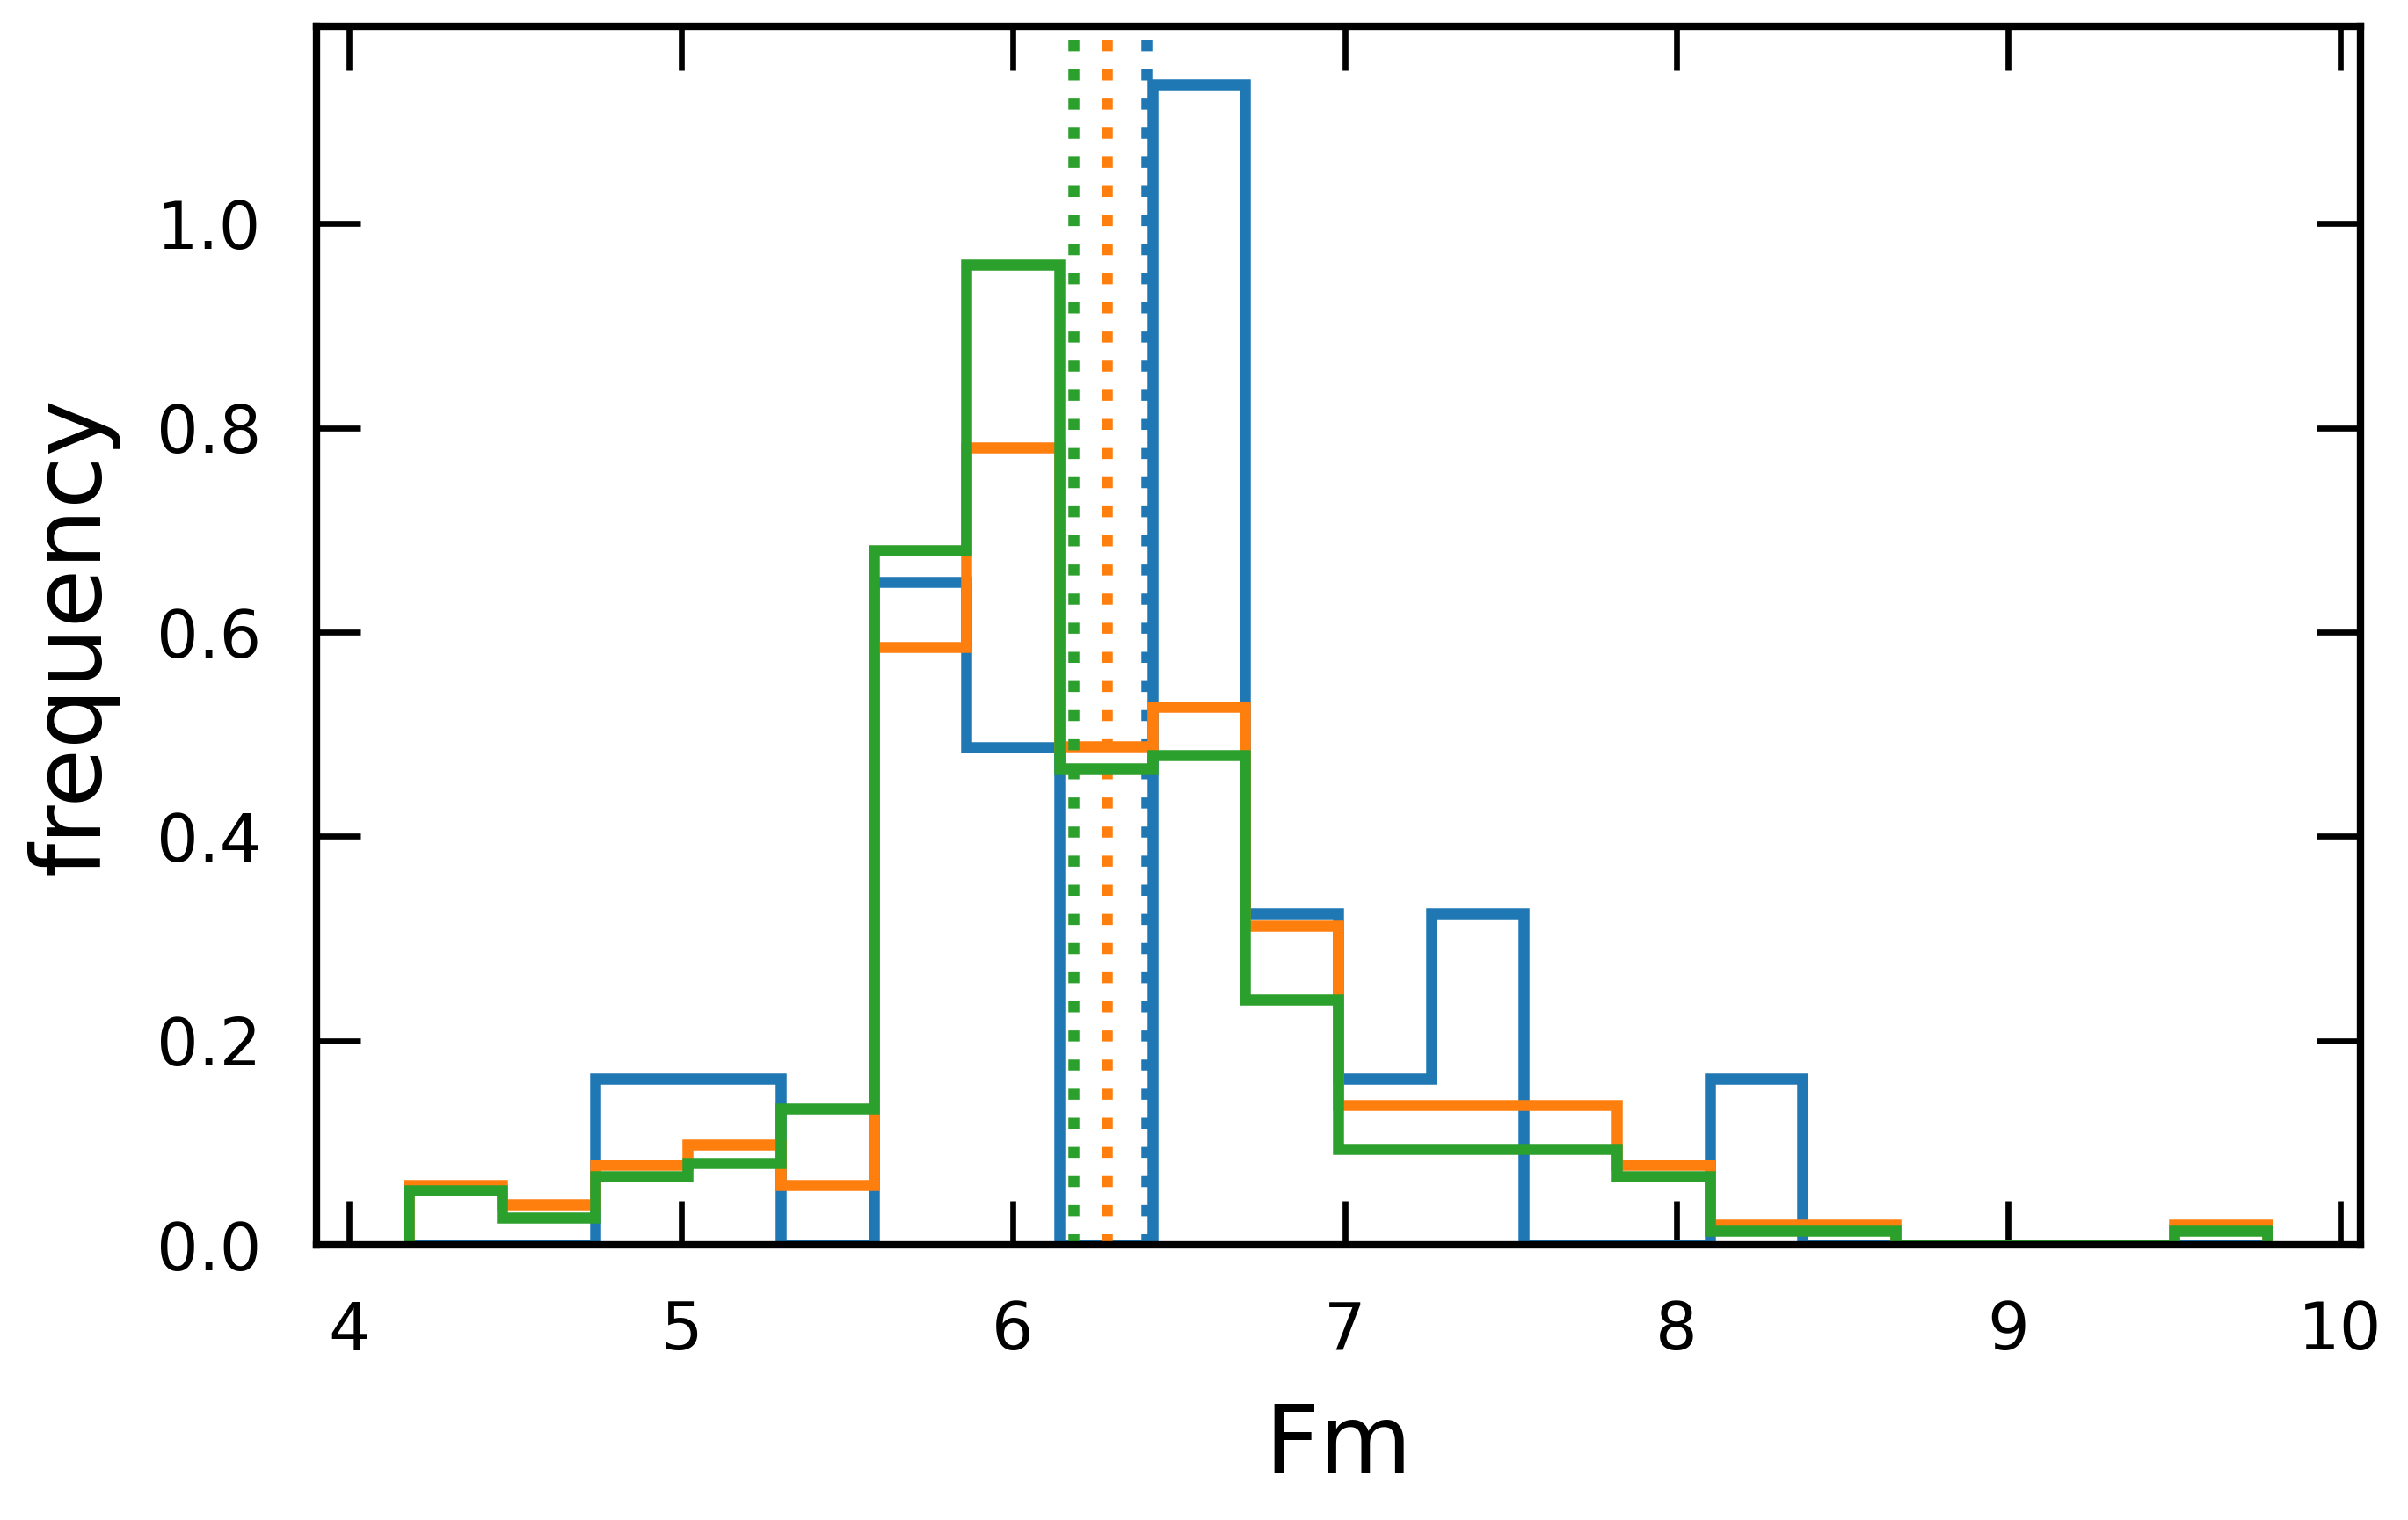

In [22]:
# select the dataset you want to show
# am I doing this only to determine the bins? probably yes
stat_to_use = 'Fm'  # plot the fanta media
filter_to_apply = Filter("Pv", "ge", 10)    # show only the players with 10+ games played
all_data = filter_to_apply.apply_to_df(stats_2324_df)[stat_to_use]

# parameters of the histograms
hist_params = {
    'bins': 20,
    'density': True,
    'histtype': 'step',
    #'alpha': 0.4,
    'lw': 3,
    'range': (all_data.min(), all_data.max()),
    'log': False,
}

def plot_hist(
        axis: Axes,
        df: pd.core.frame.DataFrame,
        column: str,
        label: str,
        filter_to_apply: Optional[Filter],
        params_dict: dict,
        show_mean: Optional[bool] = True):
    df_for_hist = filter_to_apply.apply_to_df(df)
    histogram = ax.hist(df_for_hist[column], **params_dict, label=label)
    if show_mean:
        color = histogram[2][0].get_edgecolor()
        ax.axvline(df_for_hist[column].mean(), c=color, lw=3, ls=':')
    
fig, ax = plt.subplots()
plot_hist(
    ax,
    data_ac_st_leonards['stats_2324'],
    stat_to_use,
    'our players',
    filter_to_apply,
    hist_params)
plot_hist(
    ax,
    data_players_taken['stats_2324'],
    stat_to_use,
    'all taken',
    filter_to_apply,
    hist_params)
plot_hist(
    ax,
    stats_2324_df,
    stat_to_use,
    'all',
    filter_to_apply,
    hist_params)
ax.set_xlabel(stat_to_use)
ax.set_ylabel('frequency')